# YOUR PROJECT TITLE

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from scipy import linalg
from scipy import interpolate 
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

# Model description and consumer maximization problem 

We consider the 2 good world x1 and x2 with **Cobb Douglas utility function** where:

**utility** is given by u(c).

$$ u(x_1,x_2) = 
   {x_1^{\alpha}}{x_2^{\beta}}
$$

the customer is trying to solve utility maximization problem with **budet constraint**

$$ p_1x_1 + p_2x_2 = I $$
$$ p_1,p_2,I > 0 $$

## Consumer Maximization

And we define all **symbols**:

In [10]:
alpha = sm.symbols('alpha')
beta = sm.symbols('beta')
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I = sm.symbols('I')
U = sm.symbols('U')


# we have budget constraint bc which 
bc = sm.Eq(p1*x1 + p2*x2, I)

define objective function

In [11]:
utility = x1**alpha * x2**beta

define budget constraint 

In [12]:
bc = sm.Eq(p1*x1 + p2*x2, I)

isolate x2 from budget constraint 

In [13]:
x2_c = sm.solve(bc, x2)
x2_c[0]

(I - p_1*x_1)/p_2

substitute x2 into objective function 

In [14]:
utility_subs = utility.subs(x2,x2_c[0])
utility_subs

x_1**alpha*((I - p_1*x_1)/p_2)**beta

take the derivative 

In [15]:
foc = sm.diff(utility_subs, x1)
foc

alpha*x_1**alpha*((I - p_1*x_1)/p_2)**beta/x_1 - beta*p_1*x_1**alpha*((I - p_1*x_1)/p_2)**beta/(I - p_1*x_1)

solve for FOC

In [16]:
x1_sol = sm.solve(sm.Eq(foc,0),x1)
x1_sol[0]

I*alpha/(p_1*(alpha + beta))

apply the same procedure to obtain the result of x2

In [17]:
x1_c = sm.solve(bc, x1)
utility_subs_0 = utility.subs(x1,x1_c[0])
foc_0 = sm.diff(utility_subs_0, x2)
x2_sol = sm.solve(sm.Eq(foc_0,0),x2)
x2_sol[0]

I*beta/(p_2*(alpha + beta))

## Numerical solution 

In [18]:
# first we define utility function 
def util(x1,x2,alpha,beta):
    return x1**alpha *x2**beta

To find the optimal choice of x1 and x2 we loop through a grid of $N1 \times N2$ possible solutions 

In [19]:
def optimal_choice(alpha,beta,I,p1,p2,N1,N2,do_print=True):
    
    # a. allocate numpy arrays
    shape_tuple = (N1,N2)
    x1_values = np.empty(shape_tuple)
    x2_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. start from guess of optimal value x1=x2=0
    x1_best = 0
    x2_best = 0
    u_best = util(0,0,alpha=alpha,beta=beta)
    
    # c. loop through all possibilities
    for i in range(N1):
        for j in range(N2):
            
            # i. x1 and x2 (chained assignment)
            x1_values[i,j] = x1 = (i/(N1-1))*I/p1
            x2_values[i,j] = x2 = (j/(N2-1))*I/p2
            
            # ii. utility
            if p1*x1+p2*x2 <= I: # u(x1,x2) if within budget constraint 
                u_values[i,j] = util(x1,x2,alpha=alpha,beta=beta)
            else: # u(0,0) if out of budget constraint
                u_values[i,j] = util(0,0,alpha=alpha,beta=beta)
            
            # iii. check if best sofar
            if u_values[i,j] > u_best:
                x1_best = x1_values[i,j]
                x2_best = x2_values[i,j] 
                u_best = u_values[i,j]
    
    # d. print
    if do_print:
        print_solution(x1_best,x2_best,u_best,I,p1,p2)

    return x1_best,x2_best,u_best,x1_values,x2_values,u_values

# function for printing the solution
def print_solution(x1,x2,u,I,p1,p2):
    print(f'x1 = {x1:.8f}')
    print(f'x2 = {x2:.8f}')
    print(f'u  = {u:.8f}')
    print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.8f}') 

then call the function with given values of alpha,beta,p1,p2,I, N1 and N2

In [20]:
sol_a = optimal_choice(alpha=0.5,beta=0.1,I=10,p1=1,p2=3,N1=500,N2=500)

x1 = 8.33667335
x2 = 0.55444222
u  = 2.72196177
I-p1*x1-p2*x2 = 0.00000000


3D plotting for the solution

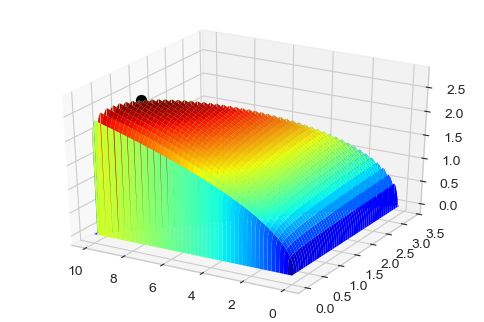

In [21]:
# a. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_a

# b. setup figure
fig = plt.figure(dpi=100,num='')
ax = fig.add_subplot(1,1,1,projection='3d')

# c. plot 3d surface of utility values with different x1 and x2
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)
ax.invert_xaxis()

# d. find optimal choice
ax.scatter(x1_best,x2_best,u_best,s=50,color='black');

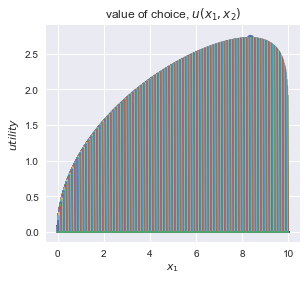

In [22]:
plt.style.use("seaborn")

# a. create the figure
fig = plt.figure(figsize=(10,4))

# b. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_a

# c. left plot
ax = fig.add_subplot(1,2,1)

ax.plot(x1_values,u_values)
ax.scatter(x1_best,u_best)

ax.set_title('value of choice, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$utility$')
ax.grid(True)

We have also applied different approach to solve the problem.
First, we define the **parameters** of p1, p2, alpha, beta and I:

In [23]:
p1 = 1
p2 = 3
I = 10
alpha = 0.5 
beta = 0.1

then we use multi-dimensional constraint solver

In [24]:
# a. objective function for minimizing 
def func_0(x,alpha,beta,I,p1,p2):
    # x is a vector
    x1 = x[0]
    x2 = x[1]
    return -util(x1,x2,alpha,beta)

# b. constraints and bounds
constraints = ({'type': 'ineq', 'fun': lambda x:  I-p1*x[0]-p2*x[1]})
bounds = ((0,I/p1),(0,I/p2))

# c. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case2 = optimize.minimize(
    func_0,initial_guess,args=(alpha,beta,p1,p2,I),
    method='SLSQP',bounds=bounds,constraints=constraints)

# d. unpack solution
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
u = util(x1,x2,alpha,beta)
print_solution(x1,x2,u,I,p1,p2)

x1 = 8.33319814
x2 = 0.55560062
u  = 2.72196243
I-p1*x1-p2*x2 = -0.00000000


# Visualization and Further Analysis 

In [25]:
#Utility function:
def u(x_1,x_2,alpha,beta):    
    u= (x_1**alpha)*x_2**(beta)
    return u

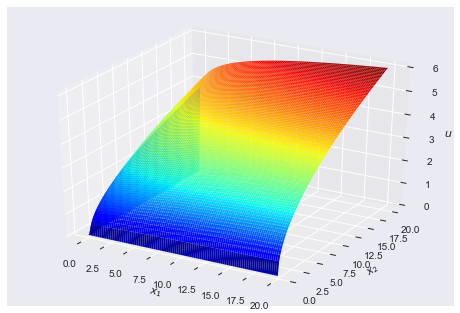

In [27]:
#Vectors:
x1_vec = np.linspace(0, 20, 100)
x2_vec = np.linspace(0, 20, 100)

#Grid:
x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec) 

#Utility function in grid:
u_grid = u(x1_grid, x2_grid, 0.5, 0.1)

#Plot:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x2_grid, x1_grid, u_grid, cmap=plt.cm.jet, cstride=1, rstride=1)

#Labels:
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.invert_xaxis()

# Conclusion

ADD CONCISE CONCLUSION.